# Violin plot legend

This notebook shows a way that you can create a legend patch for a violin plot that looks like the violin plot itself. The method is based on [this answer](https://stackoverflow.com/a/42648286/1862861) to a [question](https://stackoverflow.com/questions/42639981/how-to-show-shapefile-label-in-python-basemap-legend) on Stack Overflow.

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as pl

import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib.collections import PolyCollection
from matplotlib.path import Path

In [2]:
# generate a 3xN array of Gaussian data
x = np.random.randn(10000,3)

# just to show some difference let's shift the second array
x[:,1] *= 3.
x[:,1] += 1.5

# make the third array purely positive
x[:,2] = np.abs(x[:,2])

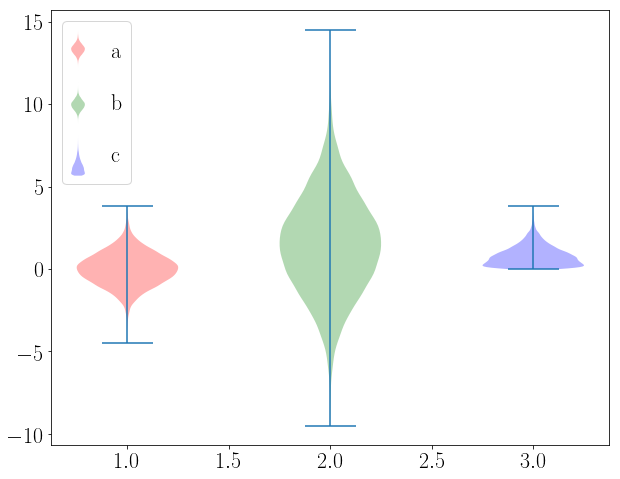

In [3]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = 22
mpl.rcParams['font.family'] = 'Serif'

# plot the data as a violin plot
fig, ax = pl.subplots(figsize=(10,8))
vp = ax.violinplot(x)

# lets make the violin plots have different colours
colours = ['r', 'g', 'b']
for i, v in enumerate(vp['bodies']):
    v.set_facecolor(colours[i])

# set the Handler for the legend artist (based on https://stackoverflow.com/a/42648286/1862861)
class HandlerViolin(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        #aspect= height/float(width)
        
        patch = mpatches.PathPatch(orig_handle.get_paths()[0])
        verts = patch.get_verts()
        minx, miny = verts[:,0].min(), verts[:,1].min()
        maxx, maxy = verts[:,0].max(), verts[:,1].max()
        #aspect = (maxy-miny)/float((maxx-minx))
        # set aspect ratio at 3:1
        aspect = 3.

        nvx = (verts[:,0]-minx)*float(height)/aspect/(maxx-minx)-x0
        nvy = (verts[:,1]-miny)*float(height)/(maxy-miny)-y0

        #p = Polygon(np.c_[nvx, nvy])
        p = mpatches.PathPatch(Path(np.c_[nvx, nvy]))
        p.set_facecolor(orig_handle.get_facecolor()[0])
        
        ec = orig_handle.get_edgecolor()
        if len(ec) == 0:
            ec = 'none'
        p.set_edgecolor(ec)
        p.set_transform(handlebox.get_transform())

        handlebox.add_artist(p)
        return p

# set violin plot 'bodies' PolyCollection as legend handle
handles = vp['bodies']   # plot legend for each violin (could just use one, e.g. handles = vp['bodies'][0]) 
labels = ['a', 'b', 'c'] # the legend text

ax.legend(handles=handles, # legend handles
          labels=labels,   # legend text
          handler_map={PolyCollection: HandlerViolin()},
          handleheight=2.5,  # height of the legend handle
          handlelength=1,  # space between the handle and text
          loc='upper left');